##### Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# 1.Data Gathering and basic information about data

In [4]:
df=pd.read_csv("train_x.csv")          ##Uploading data in notebook
df_copy=df.copy()
df_ytrain=pd.read_csv("train_y.csv")
df_ytrain=df_ytrain.drop(columns=['ID'])
df_ytrain_copy=df_ytrain.copy()
df_test=pd.read_csv("test_x.csv")

In [5]:
df.sample(5)

,ID,Expense,Income,Loan type,Occupation type,Age,Score1,Score2,Score3,Score4,Score5
3983,3984,1707.352589,14143.51890,NaN,Z,0.0,0.301718,171.433620,6.938893,600.237516,3404.900689
21455,21456,1804.643549,14003.46159,A,Y,0.0,-0.043209,180.835632,22.360085,597.630088,3451.906434
44680,44681,1594.777883,15428.27675,B,Y,1.0,0.255187,197.234708,5.058296,601.622107,3350.510662
60459,60460,1922.878228,15958.31512,A,Y,0.0,NaN,171.322609,13.837793,600.182351,3509.031054
4816,4817,1807.255505,15455.19122,B,Y,1.0,0.128327,207.011000,15.029794,601.548868,3453.168390


In [6]:
df.shape

(80000, 11)

In [7]:
df.info()     ## gives non null value for each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               80000 non-null  int64  
 1   Expense          77956 non-null  float64
 2   Income           78045 non-null  float64
 3   Loan type        77989 non-null  object 
 4   Occupation type  78141 non-null  object 
 5   Age              77986 non-null  float64
 6   Score1           78060 non-null  float64
 7   Score2           77964 non-null  float64
 8   Score3           78045 non-null  float64
 9   Score4           78028 non-null  float64
 10  Score5           78002 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 6.7+ MB


In [8]:
   ## total no. of null values in each Numeric column out of 80000 data pts.

ID                    0
Expense            2044
Income             1955
Loan type          2011
Occupation type    1859
Age                2014
Score1             1940
Score2             2036
Score3             1955
Score4             1972
Score5             1998
dtype: int64

# 2.Data Preprocessing

## Data imputing

#### About 2% missing data in every column except ID column

<AxesSubplot:>

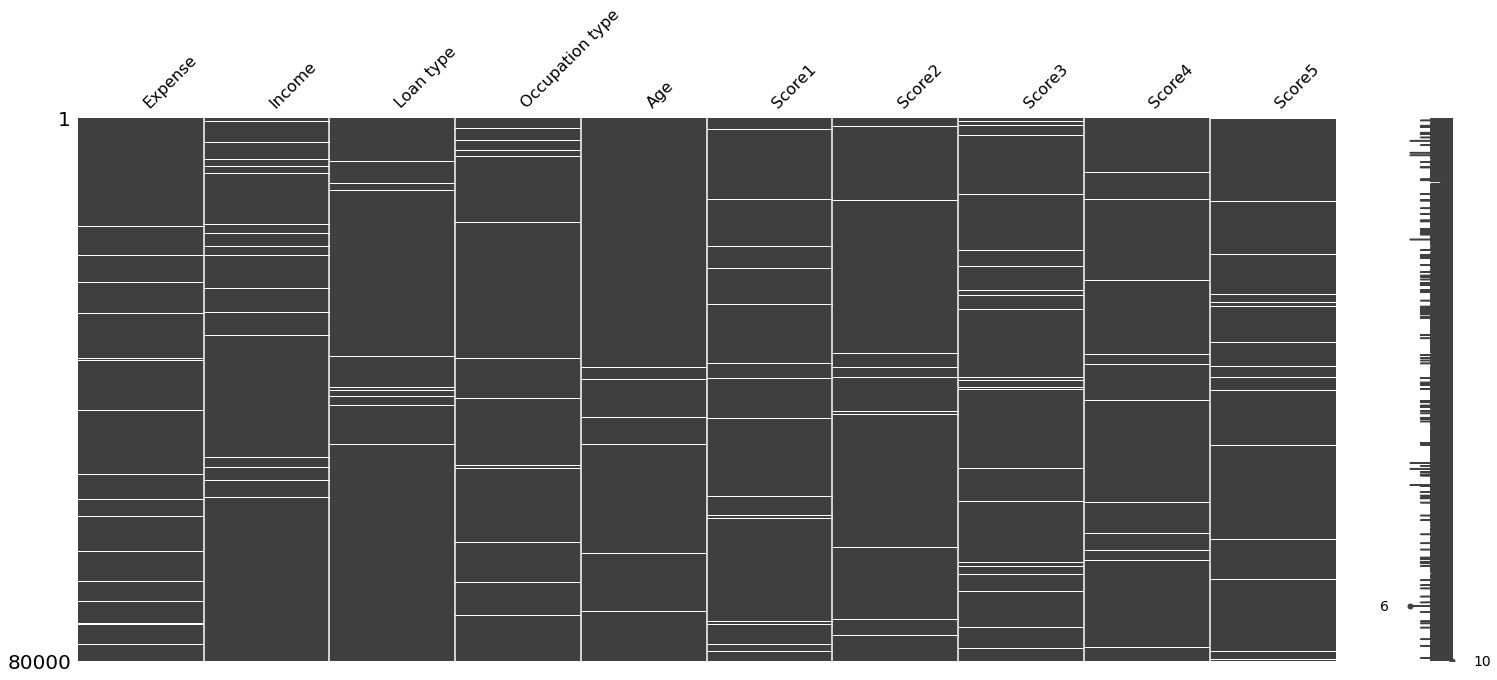

In [9]:
miss_columns=df.columns[df.isnull().any()]    #finding missing values graphically
msno.matrix(df[miss_columns])

##### Divided categorical and numeric columns

In [10]:
catcolumns=df.select_dtypes(include=['object']).columns
numcolumns=[x for x in df.columns if x not in catcolumns]

## 2.1 Imputation of categorical variables by frequency

In [13]:
for x in catcolumns:
    print(x)
    df[x].fillna(df[x].value_counts().index[0],inplace=True)
    df_test[x].fillna(df_test[x].value_counts().index[0],inplace=True)
df_test.rename(columns={'ID_Test':'ID'},inplace=True)    

Loan type
Occupation type


In [14]:
df[catcolumns].isnull().sum()

Loan type          0
Occupation type    0
dtype: int64

## 2.2 Imputation of numeric features

#### 2.2.1 Imputation of output variable of training set

In [22]:
df_ytrain.fillna(0,inplace=True)

In [23]:
df_ytrain.isnull().sum()

Label    0
dtype: int64

#### 2.2.2 Imputation of numeric features using MICE Technique

In [24]:
!pip install impyute

In [28]:
from impyute.imputation.cs import mice

# start the MICE training
imputed_training=mice(df[numcolumns].values)


In [26]:
df_mice=pd.DataFrame(imputed_training)

In [27]:
df_mice

,0,1,2,3,4,5,6,7,8
0,1.0,1830.943788,14767.28013,1.0,0.016885,205.196182,22.521523,600.911200,3464.613291
1,2.0,1645.302546,15272.26775,0.0,0.240375,194.266317,5.349117,600.888816,3374.921455
2,3.0,1555.026392,17482.49734,0.0,0.213921,183.529871,-1.054954,598.596944,3331.304886
3,4.0,1681.222110,16257.66493,0.0,0.303909,191.228965,6.971750,602.447203,3392.275849
4,5.0,1777.648916,16316.29914,1.0,0.310138,224.074728,11.218489,605.947340,3438.864083
...,...,...,...,...,...,...,...,...,...
79995,79996.0,1470.317116,16659.49663,0.0,0.208757,172.526308,-5.332184,596.648261,3290.377932
79996,79997.0,1923.617480,14910.36890,0.0,0.201837,186.252458,15.425841,600.855069,3509.388221
79997,79998.0,1711.147154,15962.25945,1.0,0.226396,196.098150,8.161353,601.360722,3406.734018
79998,79999.0,1673.822523,15525.27413,0.0,0.101090,186.390184,3.381393,596.750750,3388.700770


#### Data imputed

In [ ]:
df.sample(5)


## 2.3 Categorical features encoding 

In [ ]:
df['Loan type'].unique()

In [ ]:
df['Occupation type'].unique()

#### Dummy encoding

In [ ]:
df_dummies=pd.get_dummies(df[catcolumns],drop_first=True)
df_dummies_test=pd.get_dummies(df_test[catcolumns],drop_first=True)
df_dummies.shape

In [ ]:
df_dummies


### END RESULT AFTER PREPROCESSING: Final clean data with all numeric columns

In [ ]:
df_numeric=pd.concat([df_mice,df_dummies],axis=1)
df_numeric_test=pd.concat([df_test,df_dummies_test],axis=1)
df_numeric_test.drop(columns=catcolumns,inplace=True)

In [ ]:
df_numeric.rename(columns={0:'ID',1:'Expense',2:'Income',3:'Age',4:'Score1',5:'Score2',6:'Score3',7:'Score4',8:'Score5'},inplace=True)
df_numeric_test.rename(columns={0:'ID',1:'Expense',2:'Income',3:'Age',4:'Score1',5:'Score2',6:'Score3',7:'Score4',8:'Score5'},inplace=True)

# 3.Exploratory data analysis

#### Imbalanced output variable

In [ ]:
df_ytrain['Label'].value_counts()  

In [ ]:
count_classes=pd.value_counts(df_ytrain['Label'],sort=True)
count_classes.plot(kind='bar')
plt.title("Classes vs count of classes")
plt.xlabel('Class')
plt.ylabel('Frequency')

#### All plots combinations between  different features for understanding about data

In [ ]:
sns.pairplot(df)

In [ ]:
sns.boxplot(df_numeric['Income'])

In [ ]:
sns.boxplot(df_numeric['Expense'])

#### 1.All features plotted against frequency have gaussian distribution
#### 2.Expense and Income features have outliers

In [ ]:
sns.heatmap(df_numeric.corr(),linewidths=.5,cmap="YlGnBu")

## Standardizing the data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_numeric2=pd.DataFrame(scaler.fit_transform(df_numeric.values))
df_numeric2_test=pd.DataFrame(scaler.fit_transform(df_numeric_test.values))

### Checking Multicollinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["variables"] = df_numeric2.columns
vif["VIF"]=[variance_inflation_factor(df_numeric2.values, i) for i in range(df_numeric2.shape[1])]
vif

#### We can see  some  variables have high VIF scores therefore are correlated to one other 

# 4.Train/test split and Handling Imbalanced dataset

#### 4.1.Normal split of data

In [ ]:
x=df_numeric2.values
y=df_ytrain.values
X_TEST=df_numeric2_test.values

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.8,random_state=42)

#### 4.2. Split of data after using random over sampling technique

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler(0.8)
x_os,y_os=os.fit_sample(x,y)
xtrain_os,xtest_os,ytrain_os,ytest_os = train_test_split(x_os,y_os,train_size=0.8,random_state=42)

In [ ]:
from collections import Counter
print('Before oversampling',Counter(y.flatten()))
print('Before oversampling',Counter(y_os))

#### 4.3. Split of data after using SMOTE technique of handling imbalance set

In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_sm,y_sm=smote.fit_sample(x,y)
xtrain_sm,xtest_sm,ytrain_sm,ytest_sm = train_test_split(x_sm,y_sm,train_size=0.8,random_state=42)

In [ ]:
from collections import Counter
print('Before smote',Counter(y.flatten()))
print('Before smote',Counter(y_sm))

# 5.Modelling

### 5.1 Defining all classifiers

In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier                          
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score,f1_score,classification_report

sns.set(style='white', context='notebook', palette='deep')
kfold = StratifiedKFold(n_splits=10)

### 5.2 (Model selection using K-Fold cross validation)-comparing all models on SMOTE Balanced data

In [ ]:
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())
classifiers.append(XGBClassifier(random_state = random_state))
classifiers.append(LGBMClassifier(random_state = random_state))

cv_results = []
for classifier in classifiers :
    score=cross_val_score(classifier, x_sm,y_sm, scoring = "f1", cv = kfold, n_jobs=-1)
    cv_results.append(score)
    print('{} crossvalidation score:{}\n'.format(classifier,score.mean()))
cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis",'XGBoost','LightGBM']})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

## conclusion:
## Extraa trees performed best(97.62% f1_score) then MLPclassifier(97.51%) then KNN(96.12)

## Modelling Different algorithms-Randomforest, Extraa_trees, MLP and KNN for final stacking

#### 1.Random forest model training on normal data

In [ ]:
from sklearn.metrics import accuracy_score,f1_score,classification_report

RFC = RandomForestClassifier(random_state=2)
score=cross_val_score(RFC, x,y, scoring = "f1", cv = kfold, n_jobs=-1)
RFC.fit(xtrain,ytrain)
ypred=RFC.predict(xtest)
# Best score
print('Accuracy score for random forest: {}'.format(accuracy_score(ytest,ypred)))
print('crossval F1 score for random forest: {}'.format(score.mean()))
print('F1 score for random forest: {}'.format(f1_score(ytest,ypred)))
print(classification_report(ytest,ypred))

#### 2.random forest on oversampled data

In [ ]:
RFC2 = RandomForestClassifier(random_state=2)
score=cross_val_score(RFC2, x_os,y_os, scoring = "f1", cv = kfold, n_jobs=-1)
RFC2.fit(xtrain_os,ytrain_os)
ypred_os=RFC2.predict(xtest_os)
print('Accuracy score for random forest(oversampled): {}'.format(accuracy_score(ytest_os,ypred_os)))
print('crossval F1 score for random forest(oversampled) : {}'.format(score.mean()))
print('F1 score for random forest(oversampled): {}'.format(f1_score(ytest_os,ypred_os)))
print(classification_report(ytest_os,ypred_os))

#### 3. Random forest on smote balanced data

In [ ]:
RFC3 = RandomForestClassifier(random_state=2)
score=cross_val_score(RFC3, x_sm,y_sm, scoring = "f1", cv = kfold, n_jobs=-1)
RFC3.fit(xtrain_sm,ytrain_sm)
ypred_sm=RFC3.predict(xtest_sm)
print('Accuracy score for random forest(smote balanced): {}'.format(accuracy_score(ytest_sm,ypred_sm)))
print('crossval F1 score for random forest(smote balanced): {}'.format(score.mean()))
print('F1 score for random forest (smote balanced): {}'.format(f1_score(ytest_sm,ypred_sm)))
print(classification_report(ytest_sm,ypred_sm))

#### 4.Extraa trees training on smote balanced data

In [ ]:
ET= ExtraTreesClassifier(random_state=42)
score=cross_val_score(ET, x_sm,y_sm, scoring = "f1", cv = kfold, n_jobs=-1)
ET.fit(xtrain_sm,ytrain_sm)
ypred_sm=ET.predict(xtest_sm)

# Best score
print('Accuracy score for ExtraaTrees Classifier oversampled: {}'.format(accuracy_score(ytest_sm,ypred_sm)))
print('crossval F1 score for ExtraaTrees Classifier: {}'.format(score.mean()))
print('F1 score for Extraa Trees oversampled: {}'.format(f1_score(ytest_sm,ypred_sm)))
print(classification_report(ytest_sm,ypred_sm))

#### 5. MLP classifier training on smote data

In [ ]:
MLP= MLPClassifier(random_state=random_state)
score=cross_val_score(MLP, x_sm,y_sm, scoring = "f1", cv = kfold, n_jobs=-1)
MLP.fit(xtrain_sm,ytrain_sm)
ypred_sm=MLP.predict(xtest_sm)

# Best score
print('Accuracy score for MLP Classifier : {}'.format(accuracy_score(ytest_sm,ypred_sm)))
print('crossval F1 score for MLP Classifier: {}'.format(score.mean()))
print('F1 score for MLP : {}'.format(f1_score(ytest_sm,ypred_sm)))
print(classification_report(ytest_sm,ypred_sm))

#### 6. KNN training on smote data

In [ ]:
KNN= KNeighborsClassifier()
score=cross_val_score(KNN, x_sm,y_sm, scoring = "f1", cv = kfold, n_jobs=-1)
KNN.fit(xtrain_sm,ytrain_sm)
ypred_sm=MLP.predict(xtest_sm)

# Best score
print('Accuracy score for KNN Classifier : {}'.format(accuracy_score(ytest_sm,ypred_sm)))
print('crossval F1 score for KNN Classifier: {}'.format(score.mean()))
print('F1 score for KNN : {}'.format(f1_score(ytest_sm,ypred_sm)))
print(classification_report(ytest_sm,ypred_sm))

# Final Model combining using ensemble techniques

## 1.Ensemble Voting classifier

In [ ]:
vc= VotingClassifier(estimators=[('rfc', RFC3), ('extc', ET),
('mlp',MLP)], voting='soft', n_jobs=-1)
vc.fit(xtrain_sm,ytrain_sm)
ypred=vc.predict(xtest_sm)
score_vc=cross_val_score(vc,x_sm,y_sm,scoring='accuracy',cv=kfold,n_jobs=-1)

In [ ]:
print('Accuracy score for Voting classifier: {}'.format(accuracy_score(ytest_sm,ypred_sm)))
print('Crossval score for Voting classifier: {}'.format(score_vc.mean()))
print('F1 score for Voting : {}'.format(f1_score(ytest_sm,ypred_sm)))
print(classification_report(ytest_sm,ypred_sm))

## 2.Ensemble Stacking classifier

### Stacking Random forest, extraa trees model and Multilayer perceptron classifier model

In [29]:
from sklearn.ensemble import StackingClassifier
estimators = [('rf', RFC3),('ET', ET)]
stck = StackingClassifier(
     estimators=estimators, final_estimator=MLP)
stck.fit(xtrain_sm,ytrain_sm)
ypred_sm=stck.predict(xtest_sm)
score_stack=cross_val_score(stck,x_sm,y_sm,scoring='f1',cv=kfold,n_jobs=-1)

NameError: name 'RFC3' is not defined

In [ ]:
print('Accuracy score for Stacking classifier: {}'.format(accuracy_score(ytest_sm,ypred_sm)))
print('Crossval F1 score for Stackingclassifier: {}'.format(score_stack.mean()))
print('F1 score for Stacking classifier: {}'.format(f1_score(ytest_sm,ypred_sm)))
print(classification_report(ytest_sm,ypred_sm))

### Stacking gave better predictions than voting technique

## Final model is stacked model of RandomForest, Extraatrees and MultilayerPerceptron Classifier

## Final model fitting and predicting test data

In [ ]:
Final_model=stck
Final_model.fit(x_sm,y_sm)
ypred_testset=Final_model.predict(X_TEST)

### CSV File created for test data

In [ ]:
final_predicted_data=pd.DataFrame({'ID_Test':df_test['ID'],'Label':ypred_testset})
final_predicted_data.to_csv('pred_y.csv')